Compruebe los tipos de datos de las columnas. Obtenga los datos numéricos en un marco de datos llamado numérico y las columnas categóricas en un marco de datos llamado categóricas. (Puedes utilizar np.number y np.object para seleccionar los tipos de datos numéricos y categóricos respectivamente)

Ahora intentaremos comprobar visualmente la normalidad de las variables numéricas
Utiliza la librería seaborn para construir gráficas de distribución de las variables numéricas
Utiliza Matplotlib para construir histogramas
¿Las distribuciones de las diferentes variables numéricas se parecen a una distribución normal?

Para las variables numéricas, compruebe la multicolinealidad entre las características. Tenga en cuenta que utilizaremos la columna total_claim_amount más adelante como variable objetivo.

Elimine una de las dos características que muestren una alta correlación entre ellas (superior a 0,9). Escriba el código tanto para la matriz de correlaciones como para el mapa de calor seaborn. Si no hay ningún par de características que tengan una alta correlación, entonces no elimine ninguna característica.

In [2]:
import pandas as pd
import numpy as np

# Cargar los datos
df = pd.read_csv(r"C:\Users\marco\OneDrive\Desktop\ironhack\Laboratorios\files\marketing_customer_analysis (1).csv")#se pone siempre delante una r, porque tiene / ademas se saca el acceso directo dandole al boton derecho del archivo

In [3]:
# 1. Mostrar la forma del dataframe
print('Forma del DataFrame:', df.shape)

Forma del DataFrame: (9134, 24)


In [4]:
df.head

<bound method NDFrame.head of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor      

In [5]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
# Separar columnas numéricas y categóricas
numerical = df.select_dtypes(include=np.number)
categoricals = df.select_dtypes(include=object) 

In [14]:
numerical


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

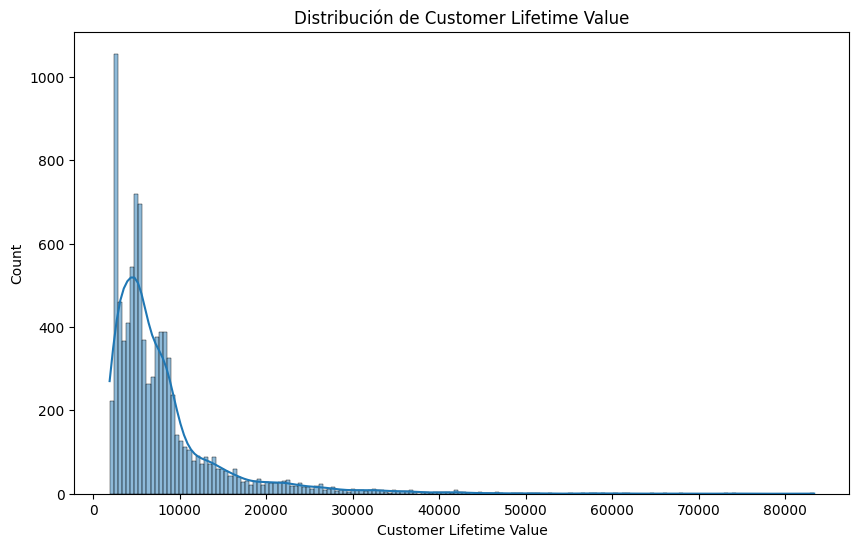

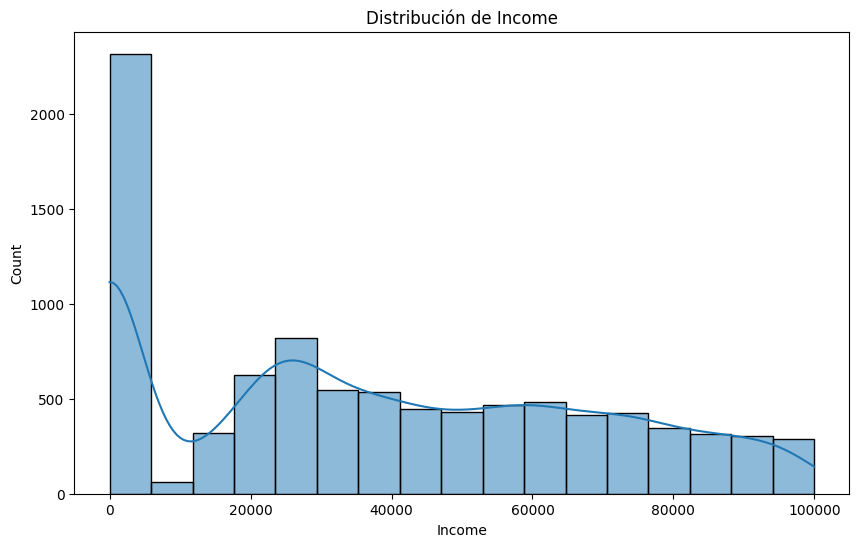

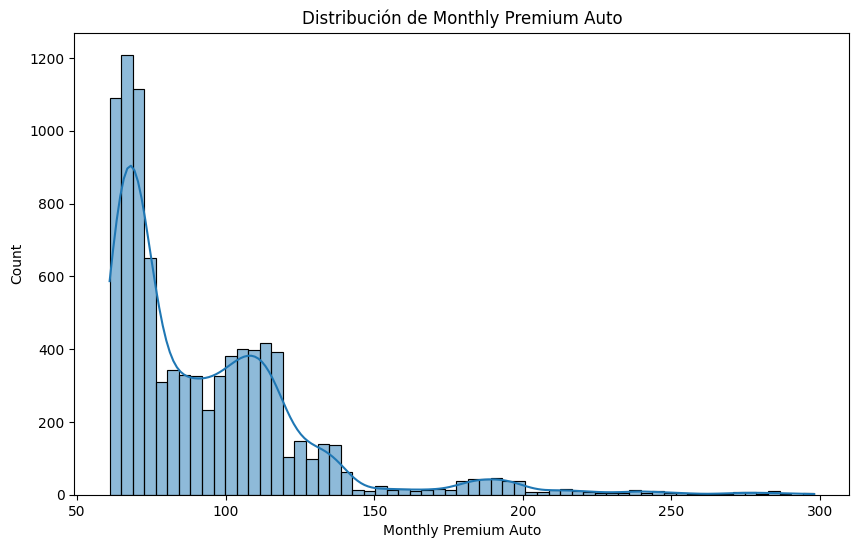

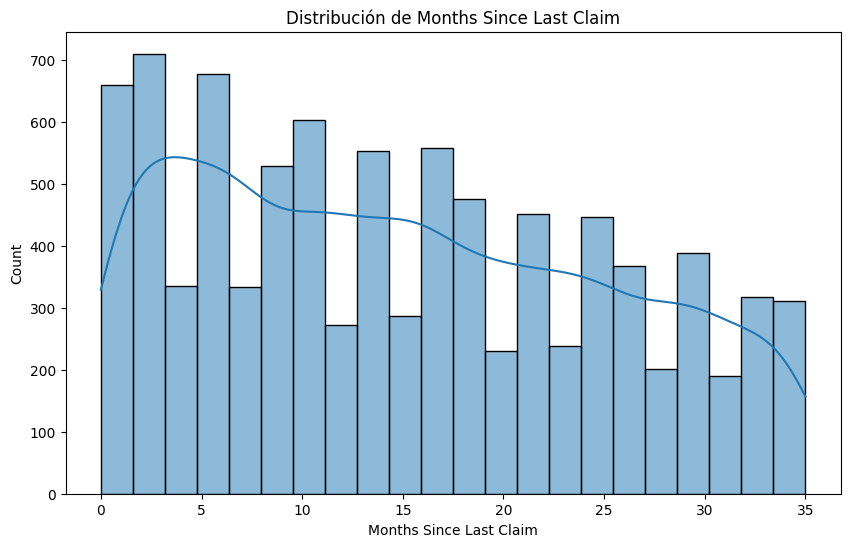

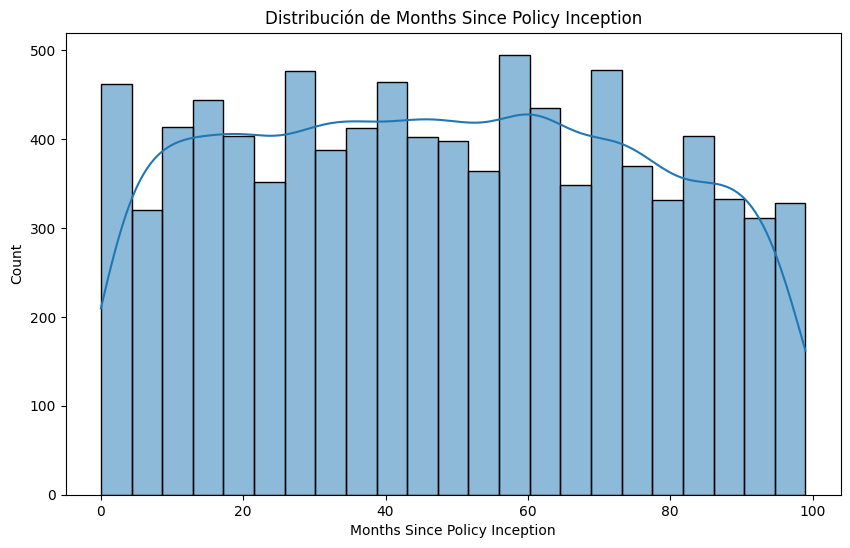

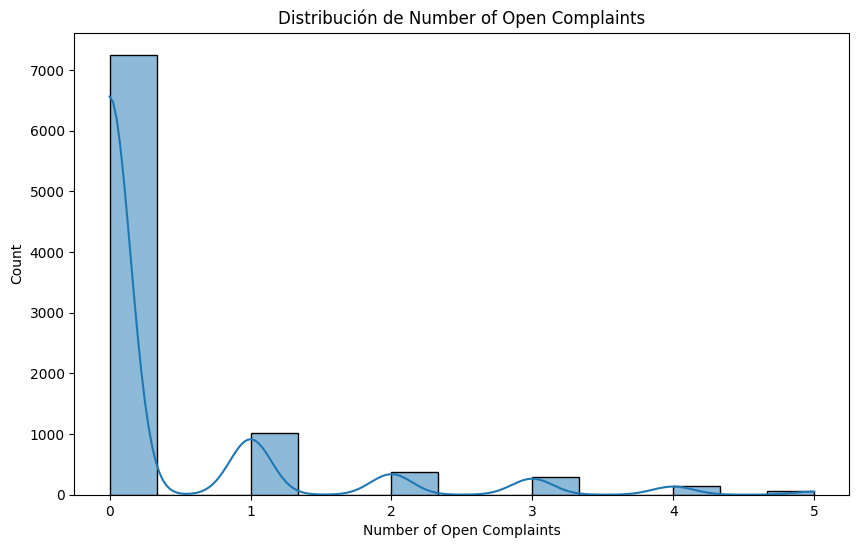

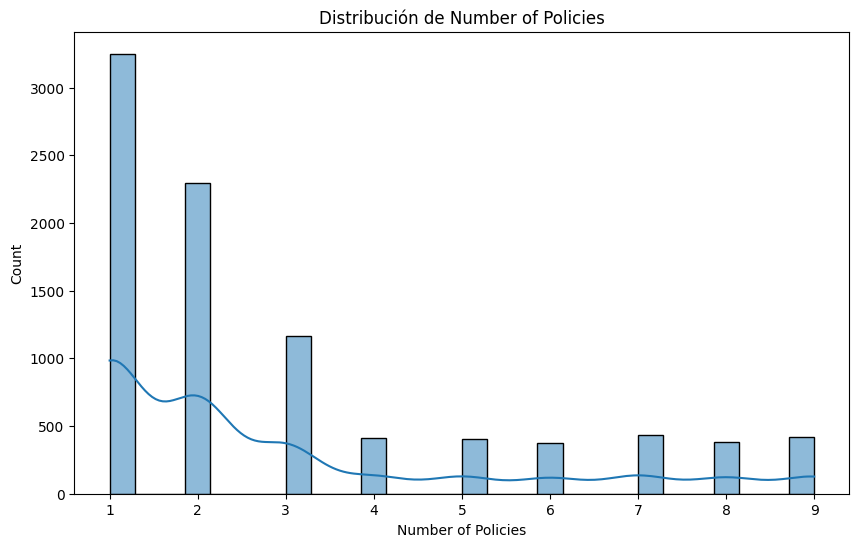

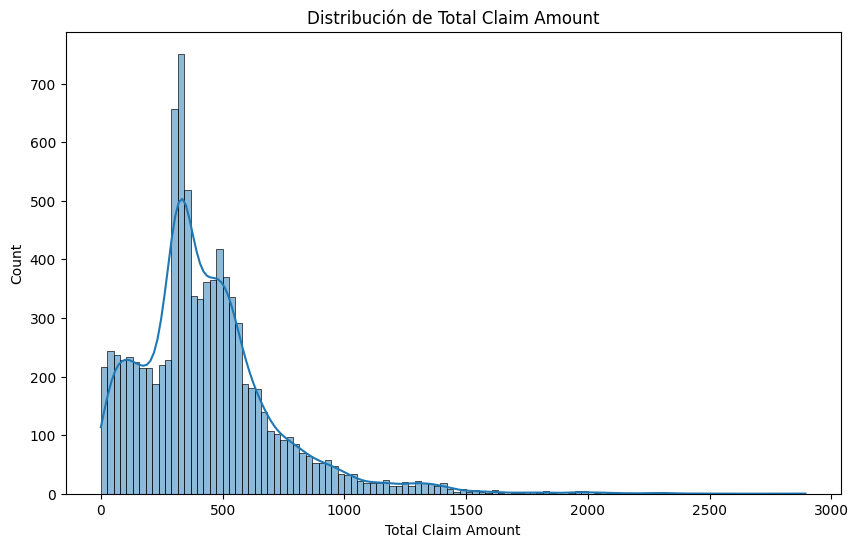

In [8]:
# Gráficos de distribución para variables numéricas
for columna in numerical.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(numerical[columna], kde=True)
    plt.title(f'Distribución de {columna}')
    plt.show()

In [10]:
# Matriz de correlación
matriz_correlacion = numerical.corr()
print(matriz_correlacion)


                               Customer Lifetime Value    Income  \
Customer Lifetime Value                       1.000000  0.024366   
Income                                        0.024366  1.000000   
Monthly Premium Auto                          0.396262 -0.016665   
Months Since Last Claim                       0.011517 -0.026715   
Months Since Policy Inception                 0.009418 -0.000875   
Number of Open Complaints                    -0.036343  0.006408   
Number of Policies                            0.021955 -0.008656   
Total Claim Amount                            0.226451 -0.355254   

                               Monthly Premium Auto  Months Since Last Claim  \
Customer Lifetime Value                    0.396262                 0.011517   
Income                                    -0.016665                -0.026715   
Monthly Premium Auto                       1.000000                 0.005026   
Months Since Last Claim                    0.005026                

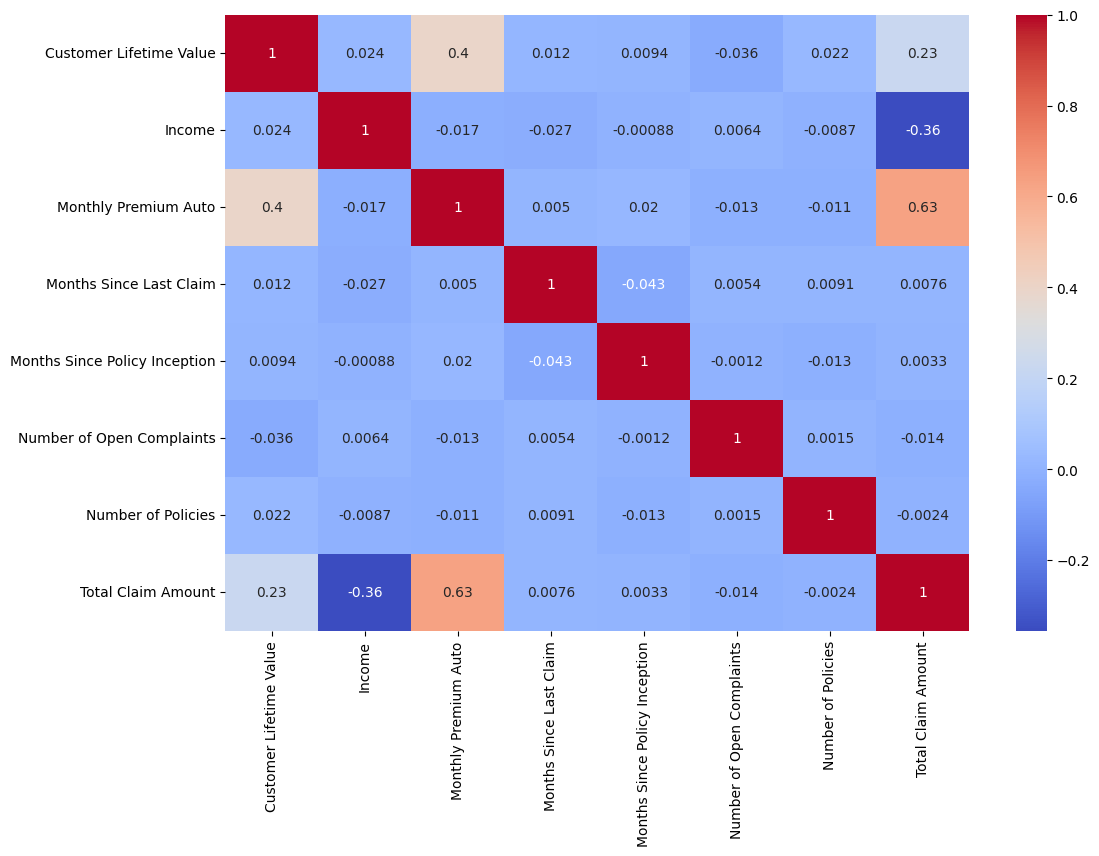

In [11]:
# Mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.show()


Como podemos ver en el grafico, no hay ningun par de características con una correlación alta, por lo tanto no descarto ninguna característica.